In [1]:
import os, sys
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cwd = os.getcwd()
repo_dir = '/'
for directory in cwd.split('/')[1:]:
    repo_dir = os.path.join(repo_dir, directory)
    if directory == 'ocean-analysis':
        break

modules_dir = os.path.join(repo_dir, 'modules')
sys.path.append(modules_dir)
try:
    import general_io as gio
except ImportError:
    raise ImportError('Must run this script from anywhere within the ocean-analysis git repo')


In [3]:
ghg_file = '/g/data/r87/dbi599/CMIP6/DAMIP/CSIRO/ACCESS-ESM1-5/hist-GHG/r1i1p1f1/Ayr/pe/gn/v20200615/pe-region-sum-anomaly_Ayr_ACCESS-ESM1-5_hist-GHG_r1i1p1f1_gn_185001-202012-cumsum.nc'

In [4]:
def get_data(infile):
    """Get the data for a particular model"""
    
    cube, history = gio.combine_files(infile, 'precipitation_minus_evaporation_flux', new_calendar='365_day')
    time_constraint = gio.get_time_constraint(['1850-01-01', '2014-12-31'])
    cube = cube.extract(time_constraint)
    anomaly_data = cube.data - cube.data[0, ::]
    start_data = cube.data[0, ::]
    end_data = anomaly_data[-1, ::]
    
    basins = ['Atlantic', 'Pacific', 'Indian', 'Arctic', 'Marginal Seas', 'Land', 'Ocean', 'Globe']
    pe_regions = ['SH Precip', 'SH Evap', 'Tropical Precip', 'NH Evap', 'NH Precip', 'Globe']
    
    df_end = pd.DataFrame(end_data, columns=basins, index=pe_regions)
    df_end.loc['Globe', 'Globe'] = np.nan
    df_end = df_end.iloc[::-1]
    total_end_evap = df_end.loc['NH Evap', 'Globe'] + df_end.loc['SH Evap', 'Globe']
#    total_end_precip = df_end.loc['NH Precip', 'Globe'] + df_end.loc['Tropical Precip', 'Globe'] + df_end.loc['SH Precip', 'Globe']
    df_end_frac = (df_end / (-1 * total_end_evap))
    
    df_start = pd.DataFrame(start_data, columns=basins, index=pe_regions)
    df_start.loc['Globe', 'Globe'] = np.nan
    df_start = df_start.iloc[::-1]
    total_start_evap = df_start.loc['NH Evap', 'Globe'] + df_start.loc['SH Evap', 'Globe']
    df_start_frac = (df_start / (-1 * total_start_evap))
    
    return df_end, df_start, df_end_frac, df_start_frac 

In [5]:
df_end, df_start, df_end_frac, df_start_frac  = get_data(ghg_file)

In [6]:
df_end

,Atlantic,Pacific,Indian,Arctic,Marginal Seas,Land,Ocean,Globe
Globe,-1.332271e+17,1.258383e+17,-8.999430e+16,2.379168e+16,-1.126610e+16,8.119257e+16,-8.485748e+16,NaN
NH Precip,1.190062e+16,3.169268e+16,4.652213e+14,2.324970e+16,-6.703249e+13,7.472388e+16,6.724119e+16,1.419651e+17
NH Evap,-1.176138e+17,-3.575344e+16,1.930956e+16,5.419771e+14,-1.119907e+16,-1.646982e+16,-1.447147e+17,-1.611846e+17
Tropical Precip,-1.065215e+16,2.138814e+17,-2.538122e+16,0.000000e+00,0.000000e+00,3.679647e+15,1.778481e+17,1.815277e+17
SH Evap,-6.768548e+16,-1.238092e+17,-1.233453e+17,0.000000e+00,0.000000e+00,-5.246016e+15,-3.148399e+17,-3.200860e+17
SH Precip,5.082369e+16,3.982685e+16,3.895741e+16,0.000000e+00,0.000000e+00,2.450487e+16,1.296079e+17,1.541128e+17


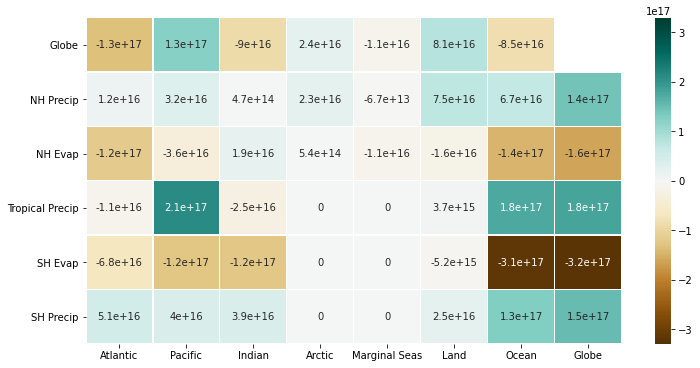

In [7]:
f, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(df_end, annot=True, cmap='BrBG', linewidths=.5, ax=ax, vmin=-3.3e17, vmax=3.3e17)
plt.show()

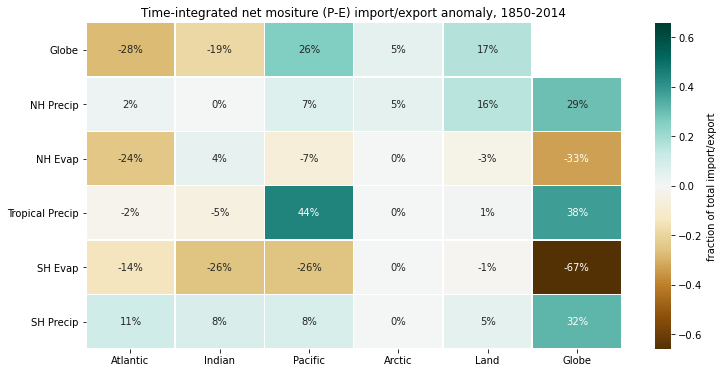

In [10]:
f, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(df_end_frac[['Atlantic', 'Indian', 'Pacific', 'Arctic', 'Land', 'Globe']],
            annot=True, cmap='BrBG', linewidths=.5, ax=ax, vmin=-.66, vmax=.66, fmt='.0%',
            cbar_kws={'label': 'fraction of total import/export'})
plt.title('Time-integrated net mositure (P-E) import/export anomaly, 1850-2014')
plt.show()

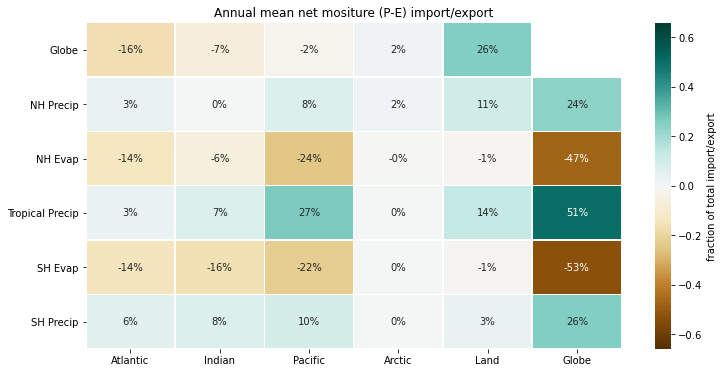

In [11]:
f, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(df_start_frac[['Atlantic', 'Indian', 'Pacific', 'Arctic', 'Land', 'Globe']],
            annot=True, cmap='BrBG', linewidths=.5, ax=ax, vmin=-.66, vmax=0.66, fmt='.0%',
            cbar_kws={'label': 'fraction of total import/export'})
plt.title('Annual mean net mositure (P-E) import/export')
plt.show()

In [13]:
df_diff_frac = df_end_frac - df_start_frac

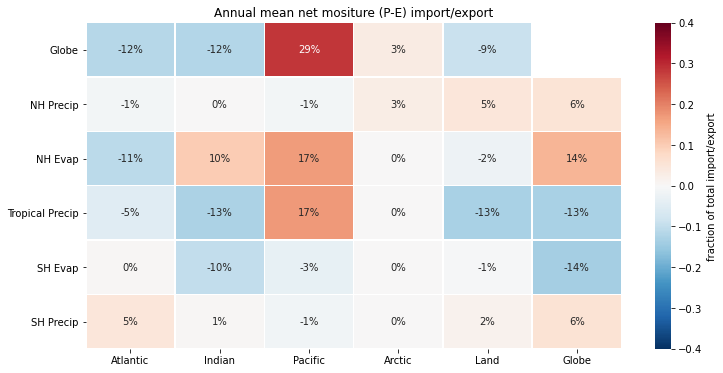

In [16]:
f, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(df_diff_frac[['Atlantic', 'Indian', 'Pacific', 'Arctic', 'Land', 'Globe']],
            annot=True, cmap='RdBu_r', linewidths=.5, ax=ax, vmin=-.4, vmax=0.4, fmt='.0%',
            cbar_kws={'label': 'fraction of total import/export'})
plt.title('Annual mean net mositure (P-E) import/export')
plt.show()

For this model/experiment...

#### Cumulative zonal anomalous moisture transport
From the Atlantic Ocean and (to a lesser extend) Indian Ocean to the Pacific Ocean and (to a lesser extent) land.

#### Cumulative meridional anomalous moisture transport
From the evaporative regions to the precipitative regions, with a few differences compared to the climatology:
- More transport poleward (as opposed to equatorward)
- More of the tropical accumulation comes from the SH than the NH